In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
# Import functions from the src folder
import sys
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Add the parent directory of `src` to the Python path
sys.path.append(os.path.abspath("../"))

In [16]:
from src.data_processing import load_data
from src.model_development  import assign_credit_score_with_non_financial

In [17]:
raw_data_path = "../data/processed/cleaned_data_Feature_Engineering.csv"
data = load_data(raw_data_path)


In [18]:
data

,customer_id,age,gender,payment_history_score,debt_to_income_ratio,savings_to_contribution_ratio,loan_history,years_in_sacco,dependents,group_membership,location
0,RW001,0.259259,M,0.666667,0.520000,0.370588,0.4,0.285714,0.500000,YES,Kigali
1,RW002,0.518519,F,0.833333,0.000000,0.350000,0.0,0.000000,0.333333,NO,Musanze
2,RW003,0.000000,F,0.500000,0.325000,0.120098,0.2,0.142857,0.000000,YES,Kigali
3,RW004,1.000000,M,0.333333,0.742857,1.000000,0.8,1.000000,0.833333,YES,Huye
4,RW005,0.407407,F,0.500000,0.000000,0.000000,0.0,0.000000,0.333333,NO,Unknown
5,RW006,0.407407,M,1.000000,0.678261,0.799659,0.6,0.428571,0.666667,YES,Kigali
6,RW007,0.111111,F,0.000000,0.260000,0.192157,0.2,0.142857,0.166667,YES,Musanze
7,RW008,0.666667,M,0.500000,0.520000,0.350000,0.4,0.571429,1.000000,NO,Huye
8,RW009,0.185185,F,0.166667,0.577778,0.366013,0.4,0.285714,0.500000,Unknown,Kigali
9,RW010,0.814815,M,0.833333,1.000000,0.844646,1.0,0.714286,0.666667,YES,Musanze


In [19]:
data.columns

Index(['customer_id', 'age', 'gender', 'payment_history_score',
       'debt_to_income_ratio', 'savings_to_contribution_ratio', 'loan_history',
       'years_in_sacco', 'dependents', 'group_membership', 'location'],
      dtype='object')

In [20]:
# Apply rule-based scoring
processed_data = assign_credit_score_with_non_financial(data)

In [21]:
processed_data

,customer_id,age,gender,payment_history_score,debt_to_income_ratio,savings_to_contribution_ratio,loan_history,years_in_sacco,dependents,group_membership,location,payment_history_score_norm,debt_to_income_score,savings_to_contribution_score,loan_history_score,years_in_sacco_score,dependents_score,group_membership_score,location_score,credit_score
0,RW001,0.259259,M,0.666667,0.520000,0.370588,0.4,0.285714,0.500000,YES,Kigali,0.066667,0.480000,0.370588,0.4,0.285714,0.500000,1,1,36.86
1,RW002,0.518519,F,0.833333,0.000000,0.350000,0.0,0.000000,0.333333,NO,Musanze,0.083333,1.000000,0.350000,0.0,0.000000,0.666667,1,1,43.23
2,RW003,0.000000,F,0.500000,0.325000,0.120098,0.2,0.142857,0.000000,YES,Kigali,0.050000,0.675000,0.120098,0.2,0.142857,1.000000,1,1,38.37
3,RW004,1.000000,M,0.333333,0.742857,1.000000,0.8,1.000000,0.833333,YES,Huye,0.033333,0.257143,1.000000,0.8,1.000000,0.166667,1,1,48.43
4,RW005,0.407407,F,0.500000,0.000000,0.000000,0.0,0.000000,0.333333,NO,Unknown,0.050000,1.000000,0.000000,0.0,0.000000,0.666667,1,0,34.40
5,RW006,0.407407,M,1.000000,0.678261,0.799659,0.6,0.428571,0.666667,YES,Kigali,0.100000,0.321739,0.799659,0.6,0.428571,0.333333,1,1,42.09
6,RW007,0.111111,F,0.000000,0.260000,0.192157,0.2,0.142857,0.166667,YES,Musanze,0.000000,0.740000,0.192157,0.2,0.142857,0.833333,1,1,37.84
7,RW008,0.666667,M,0.500000,0.520000,0.350000,0.4,0.571429,1.000000,NO,Huye,0.050000,0.480000,0.350000,0.4,0.571429,0.000000,1,1,35.04
8,RW009,0.185185,F,0.166667,0.577778,0.366013,0.4,0.285714,0.500000,Unknown,Kigali,0.016667,0.422222,0.366013,0.4,0.285714,0.500000,0,1,28.19
9,RW010,0.814815,M,0.833333,1.000000,0.844646,1.0,0.714286,0.666667,YES,Musanze,0.083333,0.000000,0.844646,1.0,0.714286,0.333333,1,1,41.73


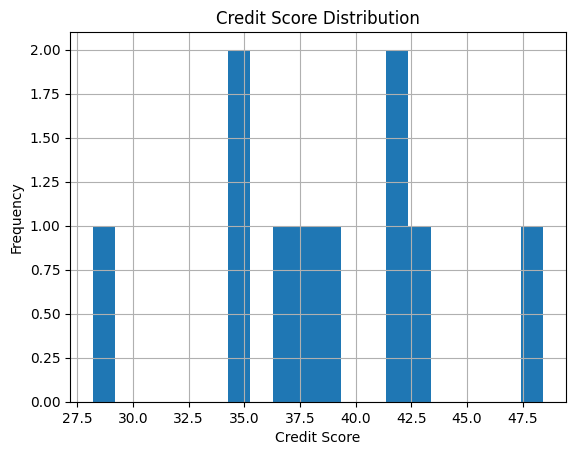

In [22]:
processed_data['credit_score'].hist(bins=20)
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

/var/folders/dp/57y4rbx55kxdswwsnmzgp_j40000gn/T/ipykernel_53308/2232861852.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = processed_data.corr()


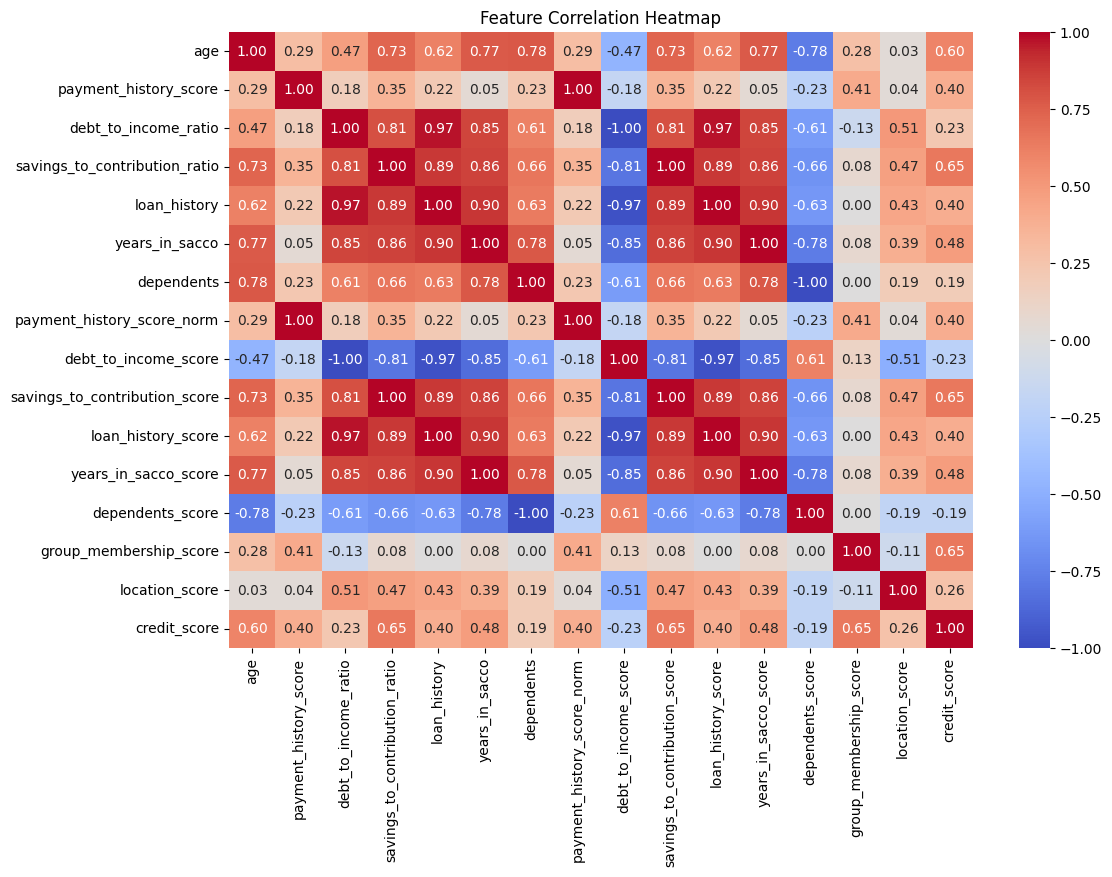

In [23]:
# Compute correlation matrix
correlation_matrix = processed_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

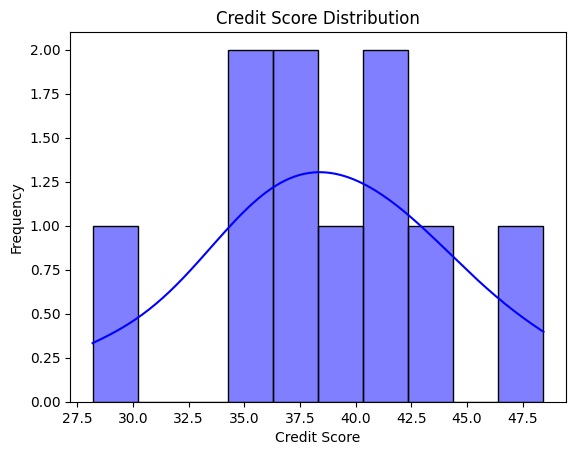

In [25]:
sns.histplot(data['credit_score'], bins=10, kde=True, color='blue')
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()